<a href="https://colab.research.google.com/github/Poofy0103/GhillLandingPage/blob/main/Overview_of_Colaboratory_Features_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

## **Import data**

In [ ]:
raw_data = pd.read_csv('/content/Training Data.csv', index_col=False, delimiter = ',')
states_data = pd.read_csv('/content/List of states by area.csv', index_col=False, delimiter = ',')

## **Explore data**

In [ ]:
raw_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
cat_var = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
num_var = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [ ]:
print('Unique values of category variables:')
print('--------'*5)
for i in cat_var:
    print('{}: {}'.format(i,raw_data[i].unique()))

Unique values of category variables:
----------------------------------------
Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_speciali

## **Consolidate Data**

In [ ]:
Profession_type = {'Mechanical_engineer':'Professional', 'Software_Developer':'Service', 'Technical_writer':'Service',
       'Civil_servant':'Government', 'Librarian':'Service', 'Economist':'Service', 'Flight_attendant':'Service',
       'Architect':'Professional', 'Designer':'Service', 'Physician':'Professional', 'Financial_Analyst':'Service',
       'Air_traffic_controller':'Professional', 'Politician':'Government', 'Police_officer':'Government', 'Artist':'Service',
       'Surveyor':'Service', 'Design_Engineer':'Professional', 'Chemical_engineer':'Professional',
       'Hotel_Manager':'Service', 'Dentist':'Professional', 'Comedian':'Service', 'Biomedical_Engineer':'Professional',
       'Graphic_Designer':'Service', 'Computer_hardware_engineer':'Service',
       'Petroleum_Engineer':'Professional', 'Secretary':'Service', 'Computer_operator':'Service',
       'Chartered_Accountant':'Professional', 'Technician':'Service', 'Microbiologist':'Professional',
       'Fashion_Designer':'Service', 'Aviator':'Professional', 'Psychologist':'Professional', 'Magistrate':'Professional',
       'Lawyer':'Professional', 'Firefighter':'Government', 'Engineer':'Professional', 'Official':'Service', 'Analyst':'Service',
       'Geologist':'Professional', 'Drafter':'Service', 'Statistician':'Professional', 'Web_designer':'Service',
       'Consultant':'Professional', 'Chef':'Service', 'Army_officer':'Government', 'Surgeon':'Professional', 'Scientist':'Professional',
       'Civil_engineer':'Professional', 'Industrial_Engineer':'Professional', 'Technology_specialist':'Service'}

In [ ]:
raw_data['Profession_Cat'] = raw_data['Profession'].map(Profession_type)

In [ ]:
raw_data['Rev_State'] = raw_data['STATE'].str.replace('_', ' ', regex=True)
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace('[','', regex=True)
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace(']', '', regex=True)

In [ ]:
raw_data['Rev_State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra Pradesh',
       'West Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar Pradesh', 'Himachal Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu and Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar Pradesh5', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace('Uttar Pradesh5', 'Uttar Pradesh',regex=True)

In [ ]:
states_data.head(10)

,Rank,State (S) / Union Territory (UT),Area (km2),Region,National share (%)
0,1 (S1),Rajasthan,"3,42,239",Northern,10.41
1,2 (S2),Madhya Pradesh,"3,08,245",Central,9.38
2,3 (S3),Maharashtra,"3,07,713",Western,9.36
3,4 (S4),Uttar Pradesh,"2,40,928",Northern,7.33
4,5 (S5),Gujarat,"1,96,024",Western,5.96
5,6 (S6),Karnataka,"1,91,792",Southern,5.83
6,7 (S7),Andhra Pradesh,"1,62,975",Southern,4.96
7,8 (S8),Odisha,"1,55,707",Eastern,4.74
8,9 (S9),Chhattisgarh,"1,35,191",Central,4.11
9,10 (S10),Tamil Nadu,"1,30,058",Southern,3.96


In [ ]:
states_data.rename(columns = {'State (S) / Union Territory (UT)': 'Rev_State'}, inplace = True)

In [ ]:
consolidated_data = pd.merge(raw_data, states_data[['Rev_State', 'Region']], how = 'left')

In [ ]:
consolidated_data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Cat,Rev_State,Region
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Professional,Madhya Pradesh,Central
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Service,Maharashtra,Western
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Service,Kerala,Southern
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Service,Odisha,Eastern
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Government,Tamil Nadu,Southern
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0,Government,Maharashtra,Western
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0,Service,Tamil Nadu,Southern
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0,Service,Gujarat,Western
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0,Service,Rajasthan,Northern
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0,Professional,Telangana,Southern


In [ ]:
consolidated_data = consolidated_data.drop(['CITY', 'STATE', 'Profession', 'Rev_State'], axis = 1)

In [ ]:
consolidated_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Profession_Cat       0
Region               0
dtype: int64

In [ ]:
consolidated_data.to_csv('Loan_prediction_final.csv', index = False)

In [ ]:
loan_df = pd.read_csv('/content/Loan_prediction_final.csv')

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   CURRENT_JOB_YRS    252000 non-null  int64 
 8   CURRENT_HOUSE_YRS  252000 non-null  int64 
 9   Risk_Flag          252000 non-null  int64 
 10  Profession_Cat     252000 non-null  object
 11  Region             252000 non-null  object
dtypes: int64(7), object(5)
memory usage: 23.1+ MB


In [ ]:
cat_var = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession_Cat', 'Region']

## **Exploratory Data Analysis (EDA)**

In [ ]:
loan_df = loan_df.drop('Id', axis = 1)

In [ ]:
loan_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Income,252000.0,NaN,NaN,NaN,4997116.665325,2878311.013611,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,NaN,NaN,NaN,49.954071,17.063855,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,NaN,NaN,NaN,10.084437,6.00259,0.0,5.0,10.0,15.0,20.0
Married/Single,252000,2,single,226272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_Ownership,252000,3,rented,231898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Ownership,252000,2,no,176000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CURRENT_JOB_YRS,252000.0,NaN,NaN,NaN,6.333877,3.647053,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,NaN,NaN,NaN,11.997794,1.399037,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,NaN,NaN,NaN,0.123,0.328438,0.0,0.0,0.0,0.0,1.0
Profession_Cat,252000,3,Professional,114446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from scipy.stats import skew

# Calculate the skewness
for var in num_var:
  print(var, ":", skew(loan_df[var], axis=0, bias=True))

Income : 0.005957527939224338
Age : -0.00531556412396366
Experience : -0.012778951281160219
CURRENT_JOB_YRS : 0.27314433155243134
CURRENT_HOUSE_YRS : 0.0067860588471736856


In [ ]:
from scipy.stats import kurtosis

# Calculate the kurtosis
for var in num_var:
  print(var, ":", kurtosis(loan_df[var], axis=0, bias=True))

Income : -1.1986385673635056
Age : -1.204768571845771
Experience : -1.1949387362671748
CURRENT_JOB_YRS : -0.7859814508239982
CURRENT_HOUSE_YRS : -1.2749475050832586


### **Unvariate Analysis**

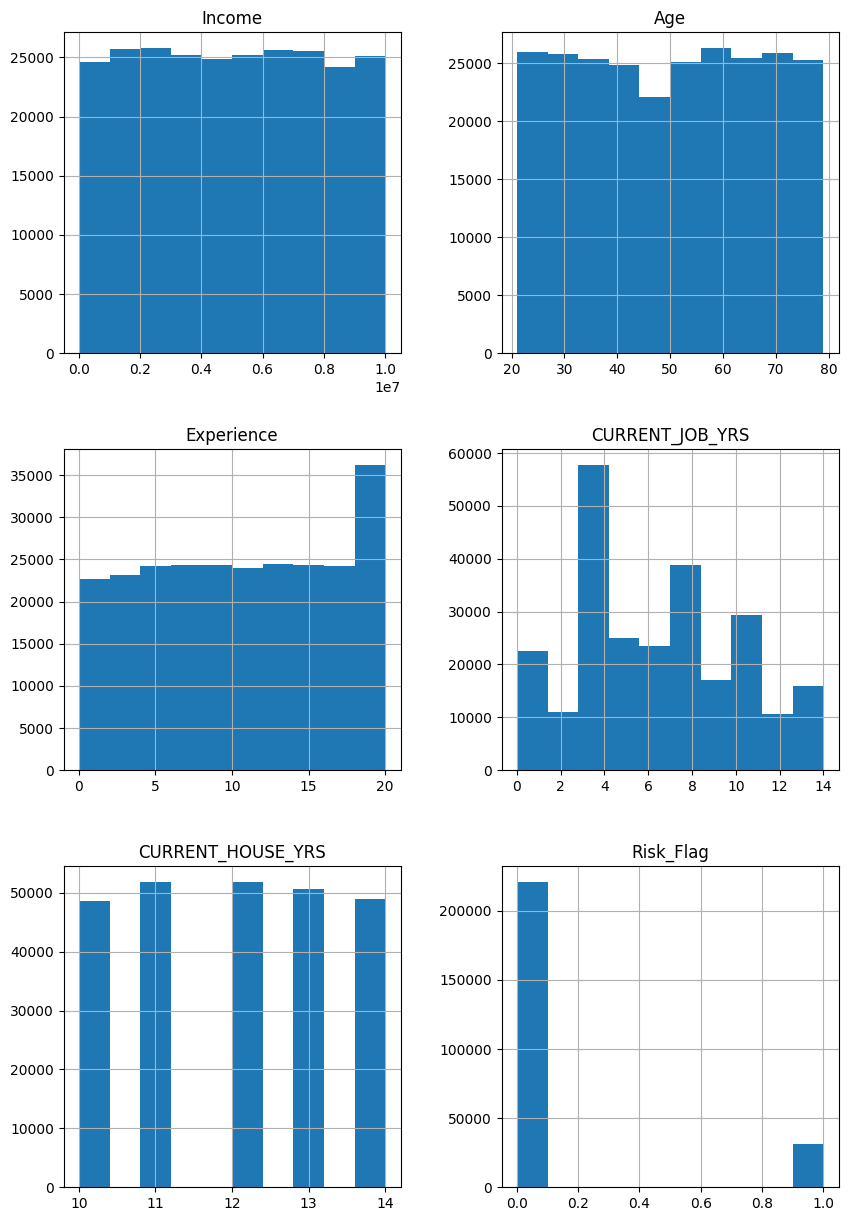

In [ ]:
loan_df.hist(figsize =(10, 15))
plt.show()

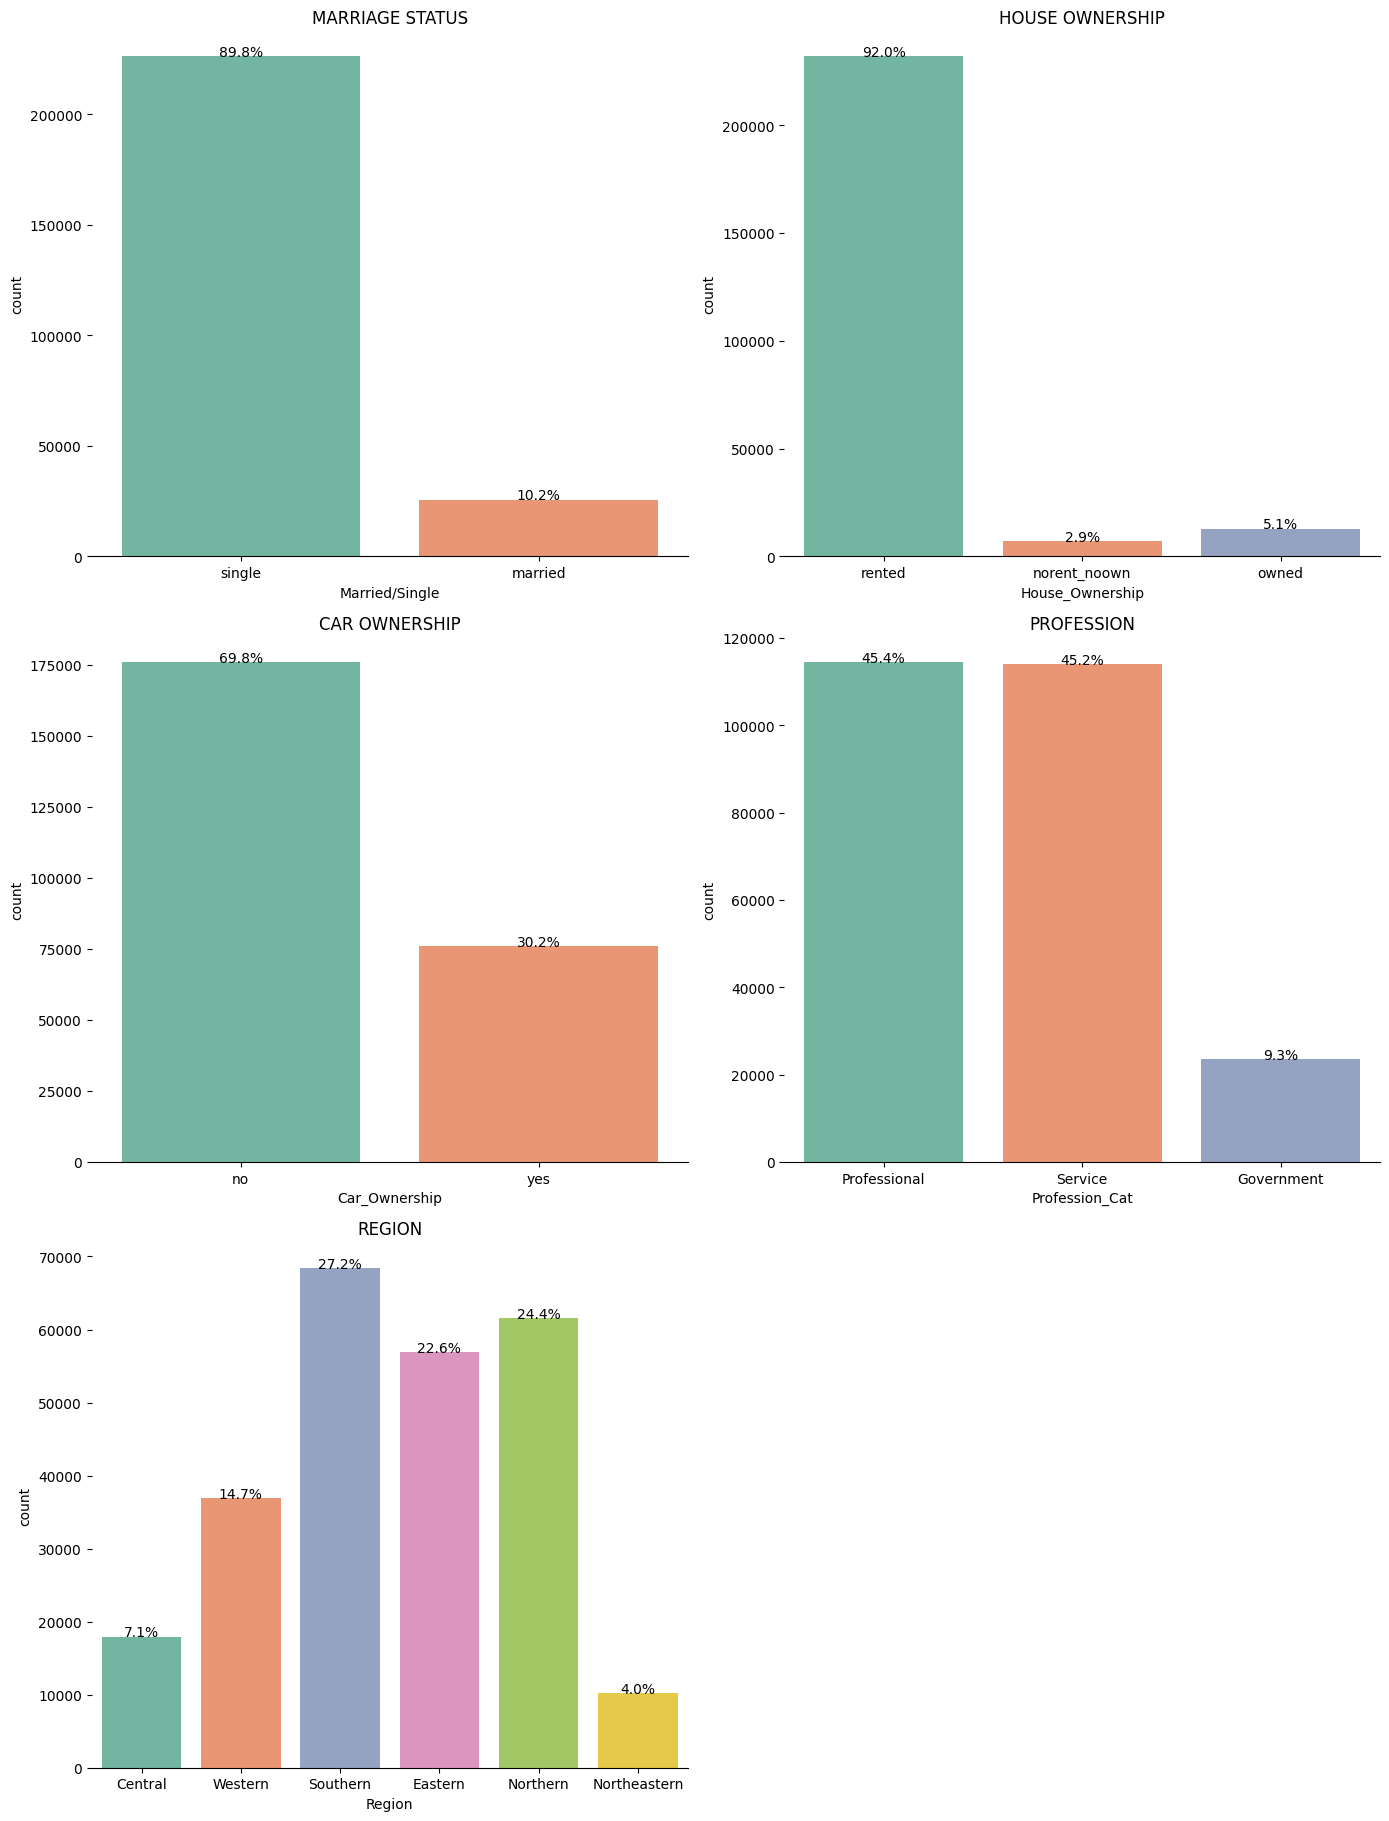

In [ ]:
title=['Marriage Status', 'House Ownership', 'Car Ownership', 'Profession', 'Region']
plt.figure(figsize=(14,30))
for i, variable in enumerate(cat_var):
    plt.subplot(5,2,i+1)
    sns.set_palette('Set2')
    ax=sns.countplot(x=loan_df[variable], data=loan_df)
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df[variable]))
          x = p.get_x() + p.get_width() / 2
          y = p.get_y() + p.get_height() + 10
          plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
plt.show()

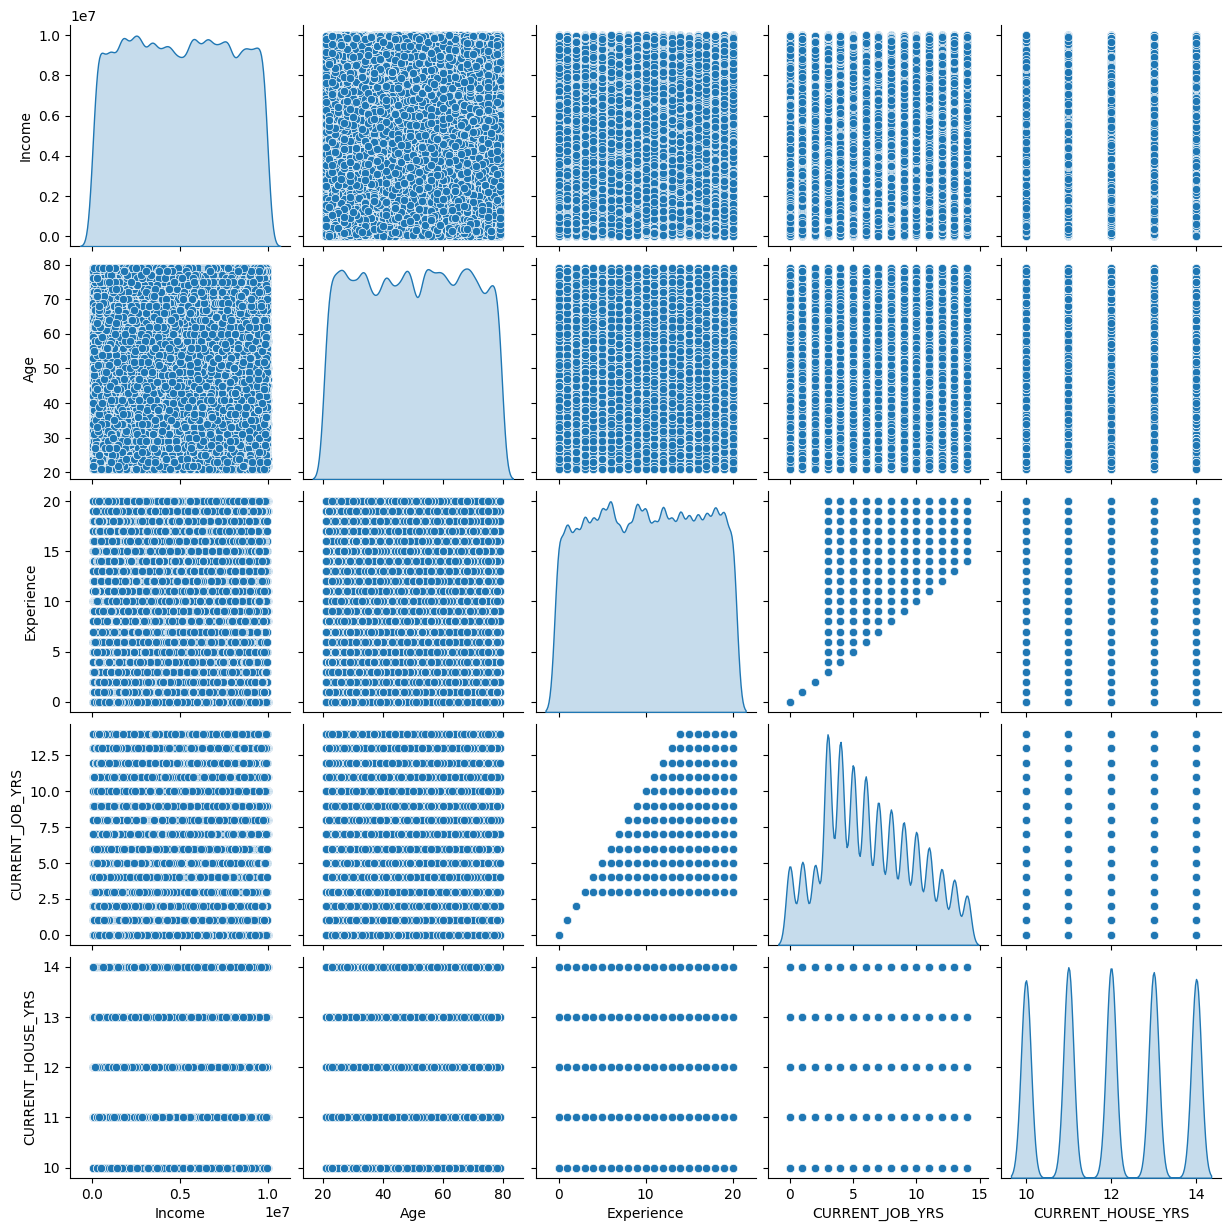

In [ ]:
sns.pairplot(loan_df[num_var], diag_kind='kde')
plt.show()

### **Multivariate Analysis**

In [ ]:
for i in num_var:
  print(pd.qcut(loan_df[i],q=3).value_counts())

(10309.999, 3318935.0]    84010
(3318935.0, 6647587.0]    84002
(6647587.0, 9999938.0]    83988
Name: Income, dtype: int64
(40.0, 60.0]      86039
(20.999, 40.0]    85149
(60.0, 79.0]      80812
Name: Age, dtype: int64
(-0.001, 7.0]    94412
(7.0, 14.0]      85120
(14.0, 20.0]     72468
Name: Experience, dtype: int64
(-0.001, 4.0]    91504
(4.0, 8.0]       87381
(8.0, 14.0]      73115
Name: CURRENT_JOB_YRS, dtype: int64
(11.0, 13.0]     102450
(9.999, 11.0]    100547
(13.0, 14.0]      49003
Name: CURRENT_HOUSE_YRS, dtype: int64


In [ ]:
print(pd.qcut(loan_df["CURRENT_HOUSE_YRS"],q=2).value_counts())

(9.999, 12.0]    152338
(12.0, 14.0]      99662
Name: CURRENT_HOUSE_YRS, dtype: int64


In [ ]:
bin_labels1 = ['Young','Middle-Age','Senior']
loan_df['Age_Group'] = pd.qcut(loan_df['Age'],q=3,labels=bin_labels1)

In [ ]:
bin_labels = ['Low','Medium','High']
loan_df['Income_Category'] = pd.qcut(loan_df['Income'],q=3,labels=bin_labels)

In [ ]:
bin_labels = ['Low','Medium','High']
loan_df['Experience_Category'] = pd.qcut(loan_df['Experience'],q=3,labels=bin_labels)

In [ ]:
bin_labels = ['Low','Medium','High']
loan_df['Current_JobYrs_Category'] = pd.qcut(loan_df['CURRENT_JOB_YRS'],q=3,labels=bin_labels)

In [ ]:
bin_labels = ["10-12", "12-14"]
loan_df['Current_HouseYrs_Category'] = pd.qcut(loan_df['CURRENT_HOUSE_YRS'],q=2,labels=bin_labels)

In [ ]:
def groupby_barchart(feature):
  df2 = loan_df.groupby([feature,'Risk_Flag']).agg({'Risk_Flag':'count'})
  df3 = df2.groupby(level=0, group_keys = False).apply(lambda x : 100 * x / float(x.sum()))
  fig = df3['Risk_Flag'].plot(kind='bar', color=['grey', 'pink', 'maroon', 'grey', 'pink','maroon'],title=f"Risk flag (%) by {feature}")
  fig.bar_label(fig.containers[0])

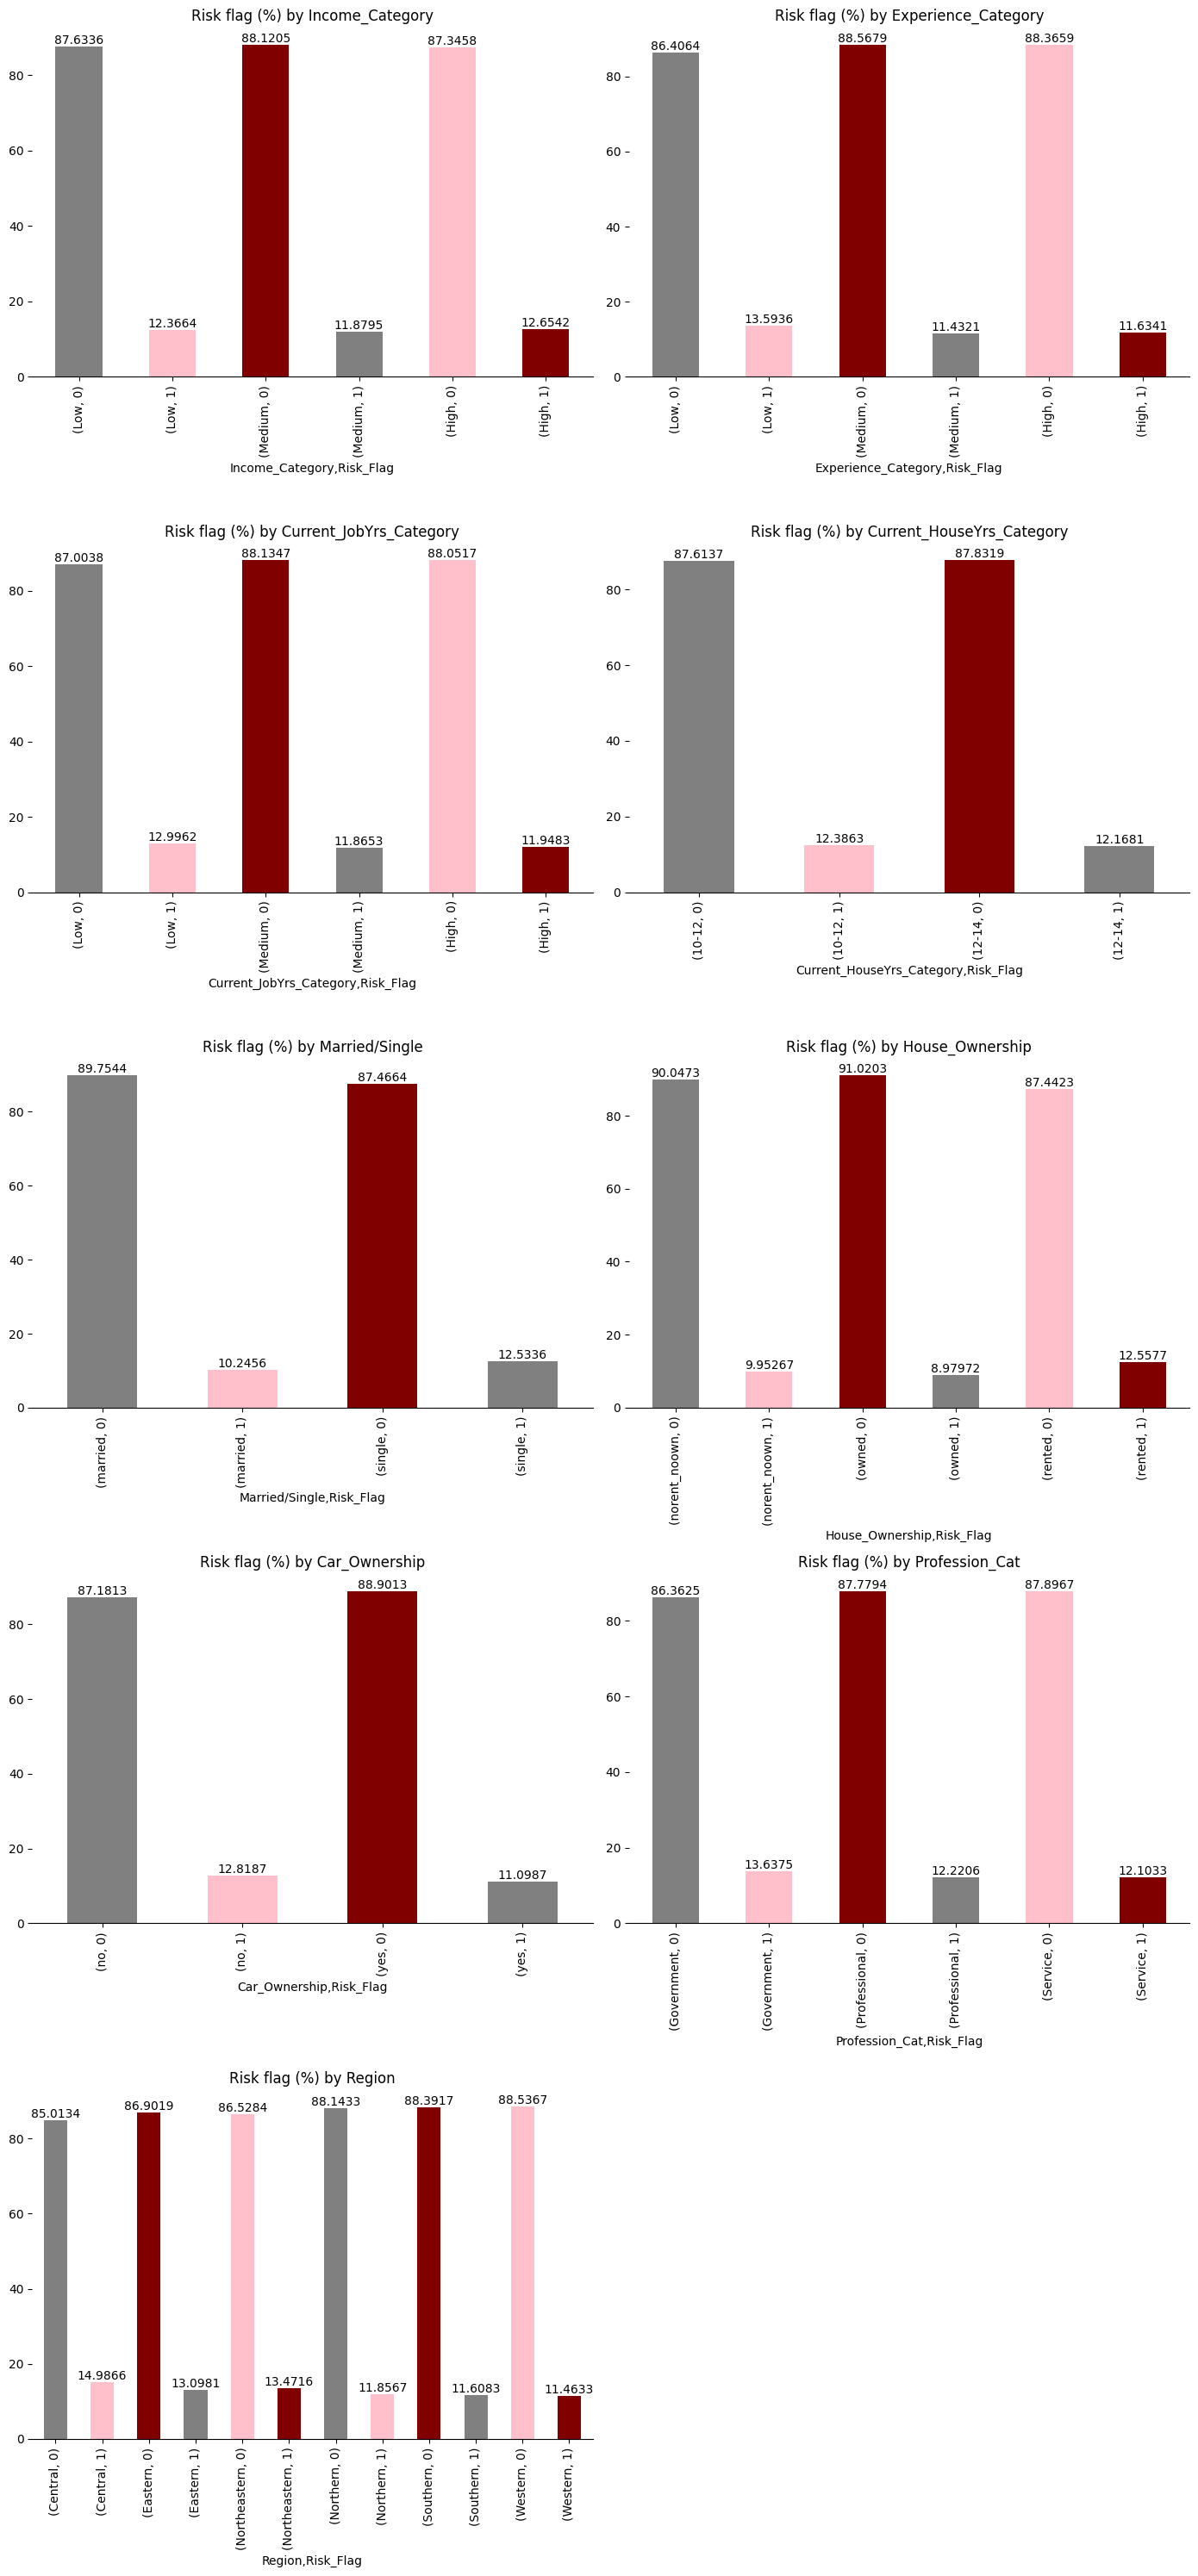

In [ ]:
plt.figure(figsize=(14,30))
for i, variable in enumerate(["Income_Category", "Experience_Category", "Current_JobYrs_Category", "Current_HouseYrs_Category"] + cat_var):
  plt.subplot(5,2,i+1)
  sns.set_palette('Set2')
  groupby_barchart(variable)
  sns.despine(top=True,right=True,left=True) # to remove side line from graph
  plt.tight_layout()
plt.show()

### **Correlation Heatmap**

<ipython-input-35-71ecee3a81d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)


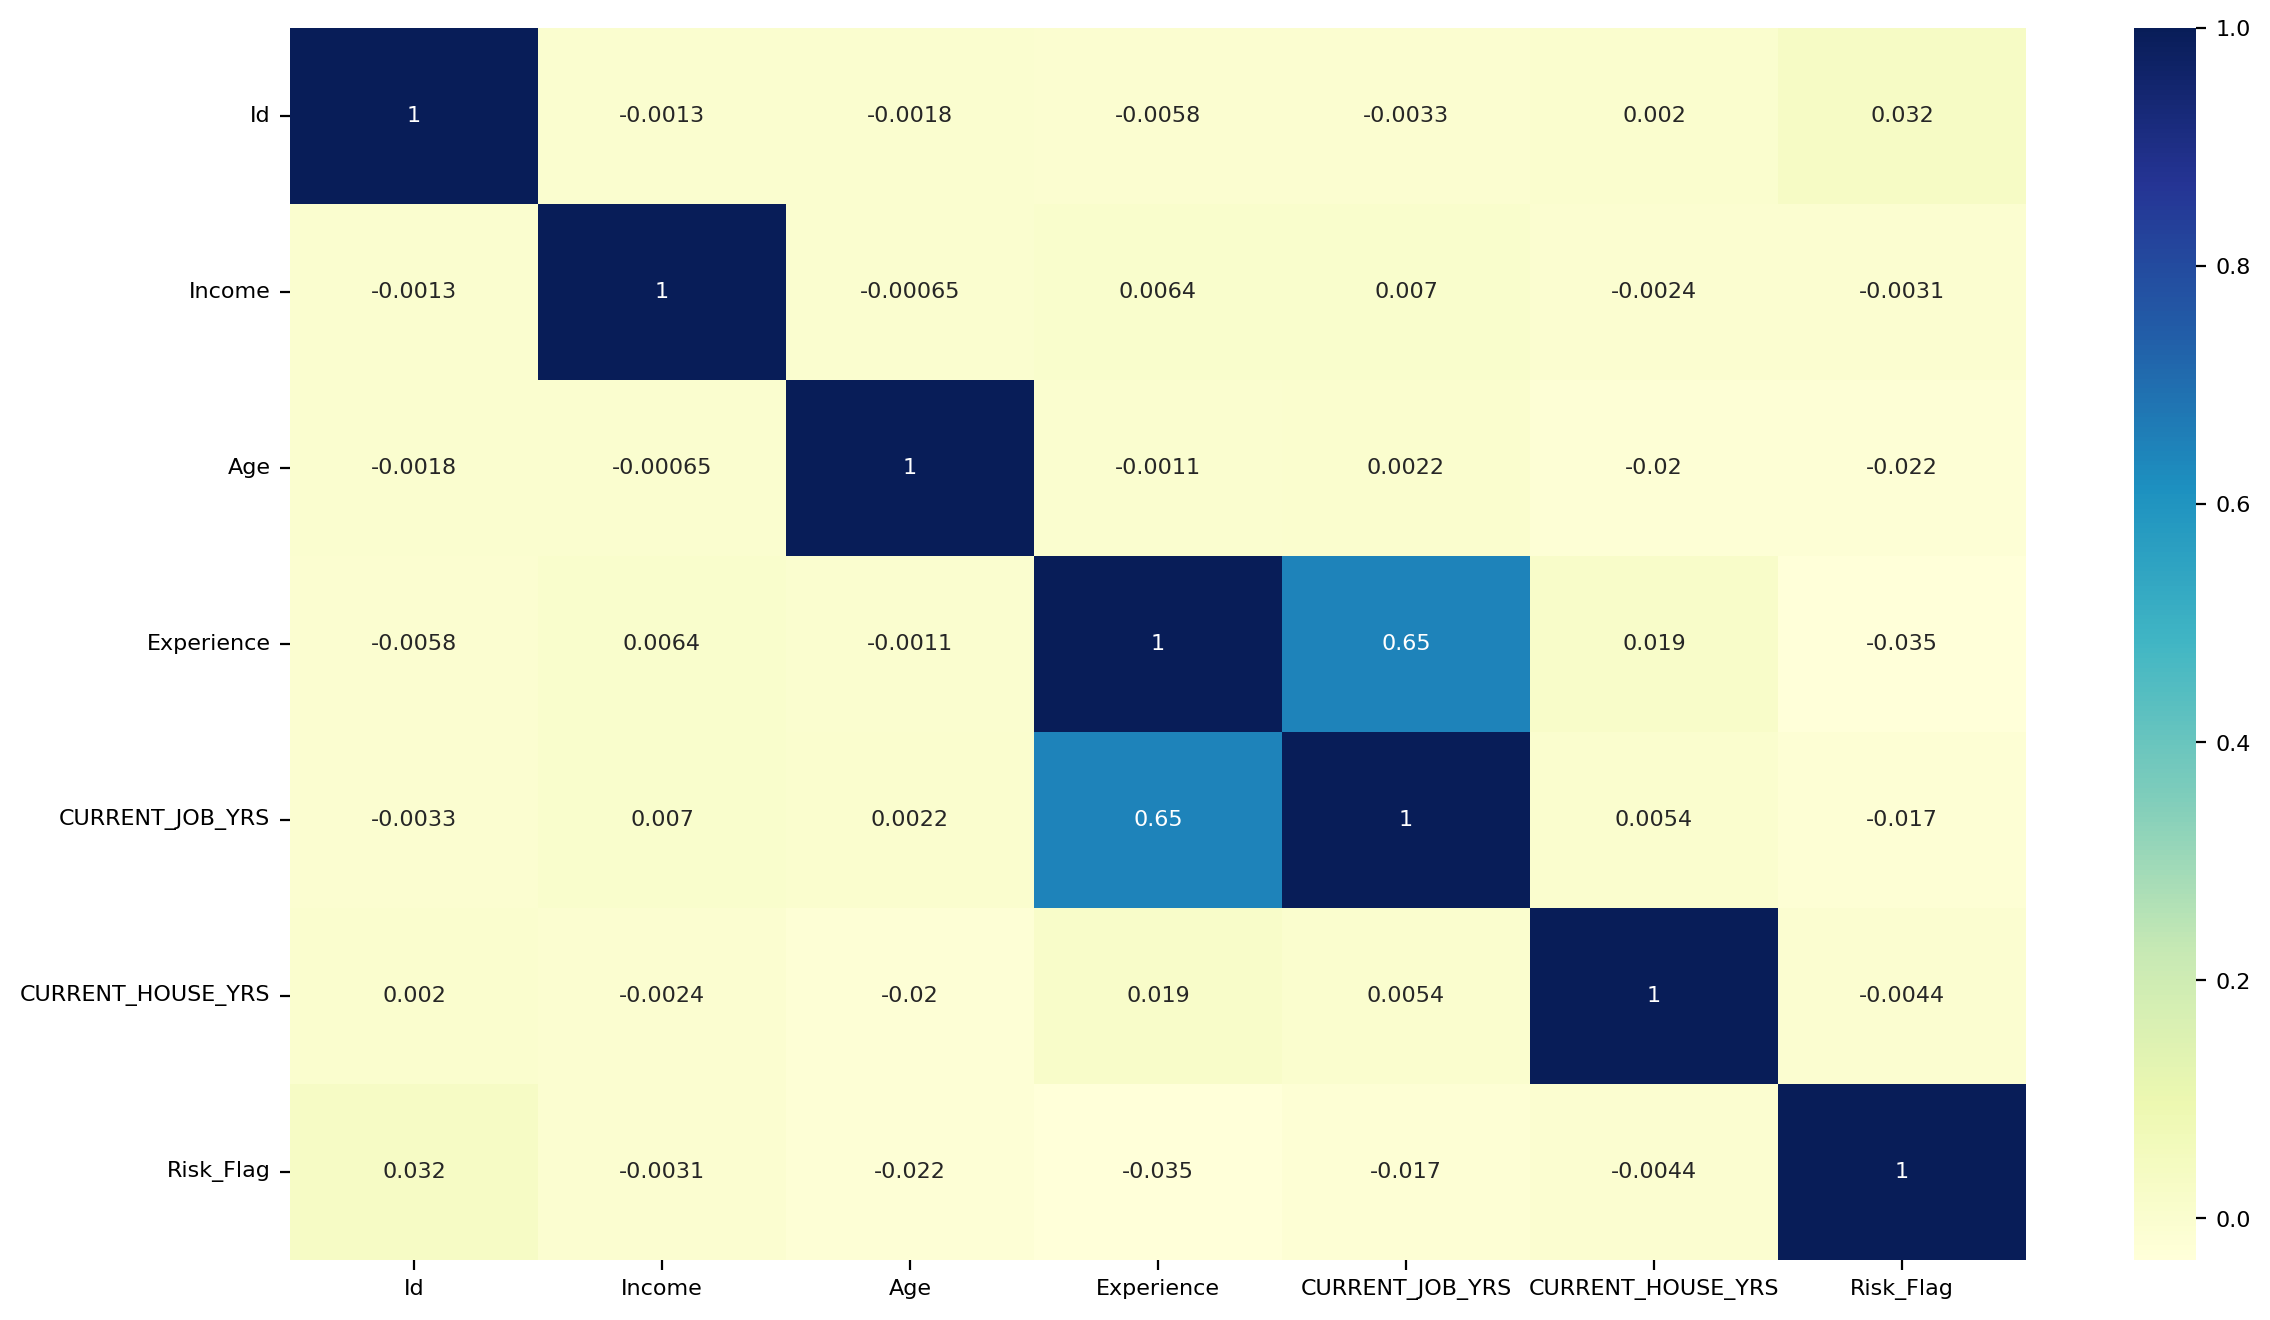

In [ ]:
dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)

## **Data Encoding**

In [ ]:
encoded_var = ['House_Ownership', 'Region', 'Profession_Cat']

In [ ]:
encoded_data = loan_df
for i in encoded_var:
    encoder = OneHotEncoder()
    encoder_results = encoder.fit_transform(loan_df[[i]])
    col_names = list(encoder.categories_[0])
    for index, value in enumerate(col_names):
        col_names[index] = f'{i}_{value}'
    encoded_data = encoded_data.join(pd.DataFrame(encoder_results.toarray(), columns=col_names))
    encoded_data = encoded_data.drop(columns=i)

In [ ]:
encoded_data.head(10)

,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,1,1303834,23,3,single,no,3,13,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7574516,40,10,single,no,9,13,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,3991815,66,4,married,no,4,10,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,6256451,41,2,single,yes,2,12,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5768871,47,11,single,no,3,14,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,6915937,64,0,single,no,0,12,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,7,3954973,58,14,married,no,8,12,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,8,1706172,33,2,single,no,2,14,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,9,7566849,24,17,single,yes,11,11,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,8964846,23,12,single,no,5,13,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
encoded_data.loc[encoded_data['Married/Single'] == 'single', 'Married/Single'] = 0
encoded_data.loc[encoded_data['Married/Single'] == 'married', 'Married/Single'] = 1
encoded_data['Married/Single'] = pd.to_numeric(encoded_data['Married/Single'])

In [ ]:
encoded_data.loc[encoded_data['Car_Ownership'] == 'yes', 'Car_Ownership'] = 1
encoded_data.loc[encoded_data['Car_Ownership'] == 'no', 'Car_Ownership'] = 0
encoded_data['Car_Ownership'] = pd.to_numeric(encoded_data['Car_Ownership'])

In [ ]:
encoded_data.head(10)

,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,1,1303834,23,3,0,0,3,13,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7574516,40,10,0,0,9,13,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,3991815,66,4,1,0,4,10,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,6256451,41,2,0,1,2,12,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5768871,47,11,0,0,3,14,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,6915937,64,0,0,0,0,12,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,7,3954973,58,14,1,0,8,12,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,8,1706172,33,2,0,0,2,14,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,9,7566849,24,17,0,1,11,11,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,8964846,23,12,0,0,5,13,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            252000 non-null  int64  
 1   Income                        252000 non-null  int64  
 2   Age                           252000 non-null  int64  
 3   Experience                    252000 non-null  int64  
 4   Married/Single                252000 non-null  int64  
 5   Car_Ownership                 252000 non-null  int64  
 6   CURRENT_JOB_YRS               252000 non-null  int64  
 7   CURRENT_HOUSE_YRS             252000 non-null  int64  
 8   Risk_Flag                     252000 non-null  int64  
 9   House_Ownership_norent_noown  252000 non-null  float64
 10  House_Ownership_owned         252000 non-null  float64
 11  House_Ownership_rented        252000 non-null  float64
 12  Region_Central                252000 non-nul

## **Outliers detection**

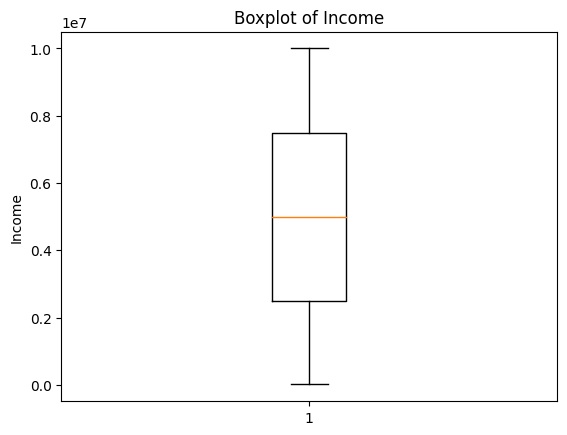

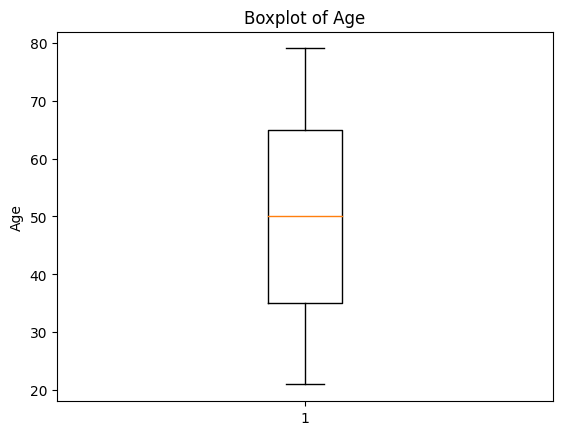

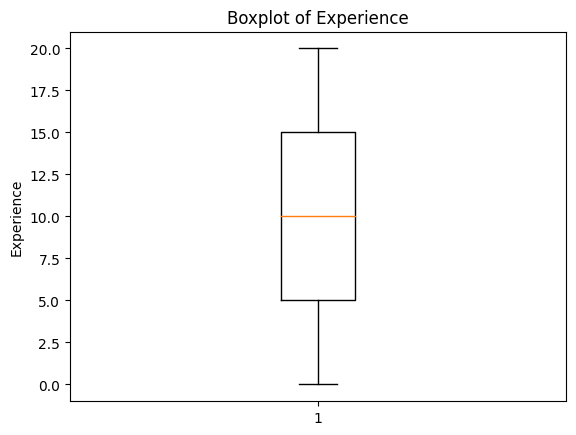

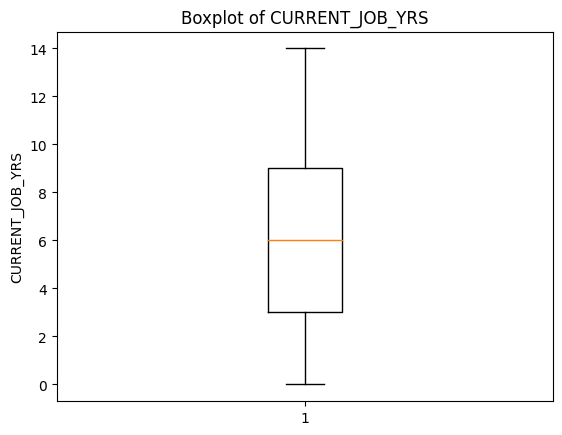

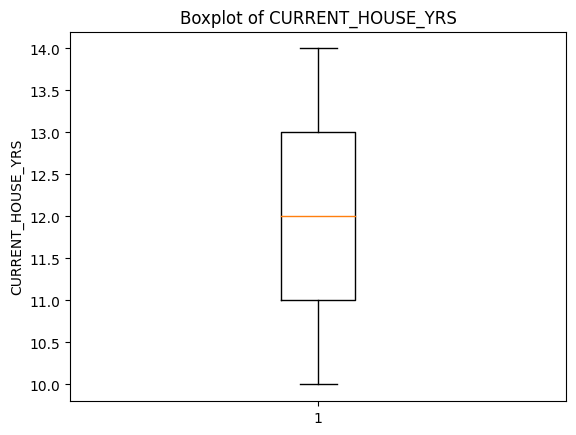

In [ ]:
for i in num_var:
    plt.boxplot(encoded_data[i])
    plt.ylabel(i)
    plt.title(f'Boxplot of {i}')
    plt.show()

## **Standardization**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data[num_var])
scaled_df_data = pd.DataFrame(scaled_data, columns = num_var)

In [ ]:
scaled_df_data.head(10)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135
5,0.666649,0.823141,-1.680018,-1.736714,0.001577
6,-0.362068,0.471520,0.652314,0.456842,0.001577
7,-1.143362,-0.993568,-1.346827,-1.188325,1.431135
8,0.892794,-1.521000,1.152099,1.279425,-0.713202
9,1.378495,-1.579604,0.319123,-0.365742,0.716356


In [ ]:
transformed_data = pd.concat([scaled_df_data, encoded_data.drop(columns=num_var)], axis=1)
transformed_data.head(10)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Id,Married/Single,Car_Ownership,Risk_Flag,House_Ownership_norent_noown,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,1,0,0,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,2,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,3,1,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577,4,0,1,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.268128,-0.173119,0.152528,-0.914131,1.431135,5,0,0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.666649,0.823141,-1.680018,-1.736714,0.001577,6,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,-0.362068,0.471520,0.652314,0.456842,0.001577,7,1,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,-1.143362,-0.993568,-1.346827,-1.188325,1.431135,8,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.892794,-1.521000,1.152099,1.279425,-0.713202,9,0,1,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1.378495,-1.579604,0.319123,-0.365742,0.716356,10,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        252000 non-null  float64
 1   Age                           252000 non-null  float64
 2   Experience                    252000 non-null  float64
 3   CURRENT_JOB_YRS               252000 non-null  float64
 4   CURRENT_HOUSE_YRS             252000 non-null  float64
 5   Id                            252000 non-null  int64  
 6   Married/Single                252000 non-null  int64  
 7   Car_Ownership                 252000 non-null  int64  
 8   Risk_Flag                     252000 non-null  int64  
 9   House_Ownership_norent_noown  252000 non-null  float64
 10  House_Ownership_owned         252000 non-null  float64
 11  House_Ownership_rented        252000 non-null  float64
 12  Region_Central                252000 non-nul

## **Feature Selection**

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 8
pd.set_option('display.max_columns', None)

### **Backward Elimination**

In [ ]:
X = transformed_data.drop('Risk_Flag', axis=1)  # Features
y = transformed_data['Risk_Flag'] # Target variable

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Risk_Flag   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     83.05
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.94e-289
Time:                        08:03:40   Log-Likelihood:                -76289.
No. Observations:              252000   AIC:                         1.526e+05
Df Residuals:                  251982   BIC:                         1.528e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0557      0.001     46.996      0.000       0.053       0.058
Income                          -0.0010      0.001     -1.476      0.140      -0.002       0.000
Age                             -0.0069      0.001    -10.600      0.000      -0.008      -0.006
Experience                      -0.0133      0.001    -15.593      0.000      -0.015      -0.012
CURRENT_JOB_YRS                  0.0032      0.001      3.715      0.000       0.002       0.005
CURRENT_HOUSE_YRS               -0.0012      0.001     -1.896      0.058      -0.003    4.17e-05
Id                            1.436e-07   8.97e-09     16.005      0.000    1.26e-07    1.61e-07
Married/Single                  -0.0228      0.002    -10.592      0.000      -0.027      -0.019
Car_Ownership                   -0.0168      0.001    -11.803      0.000      -0.020      -0.014
House_Ownership_norent_noown     0.0126      0.003      4.295      0.000       0.007       0.018
House_Ownership_owned            0.0038      0.002      1.621      0.105      -0.001       0.008
House_Ownership_rented           0.0392      0.001     27.441      0.000       0.036       0.042
Region_Central                   0.0320      0.002     14.669      0.000       0.028       0.036
Region_Eastern                   0.0130      0.001      9.426      0.000       0.010       0.016
Region_Northeastern              0.0153      0.003      5.425      0.000       0.010       0.021
Region_Northern                  0.0013      0.001      0.938      0.348      -0.001       0.004
Region_Southern                 -0.0025      0.001     -1.952      0.051      -0.005    1.03e-05
Region_Western                  -0.0034      0.002     -2.107      0.035      -0.007      -0.000
Profession_Cat_Government        0.0283      0.002     17.248      0.000       0.025       0.032
Profession_Cat_Professional      0.0142      0.001     14.009      0.000       0.012       0.016
Profession_Cat_Service           0.0132      0.001     12.901      0.000       0.011       0.015
==============================================================================
Omnibus:                   104714.360   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           327375.068
Skew:                           2.276   Prob(JB):                         0.00
Kurtosis:                       6.233   Cond. No.                     2.00e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
valid_features = backward_elimination(X, y)

In [ ]:
valid_features.remove('const')

['const',
 'Age',
 'Experience',
 'CURRENT_JOB_YRS',
 'Id',
 'Married/Single',
 'Car_Ownership',
 'House_Ownership_rented',
 'Region_Central',
 'Region_Eastern',
 'Region_Northeastern',
 'Region_Southern',
 'Region_Western',
 'Profession_Cat_Government',
 'Profession_Cat_Professional',
 'Profession_Cat_Service']

## **Split Data**

<Axes: xlabel='Risk_Flag', ylabel='count'>

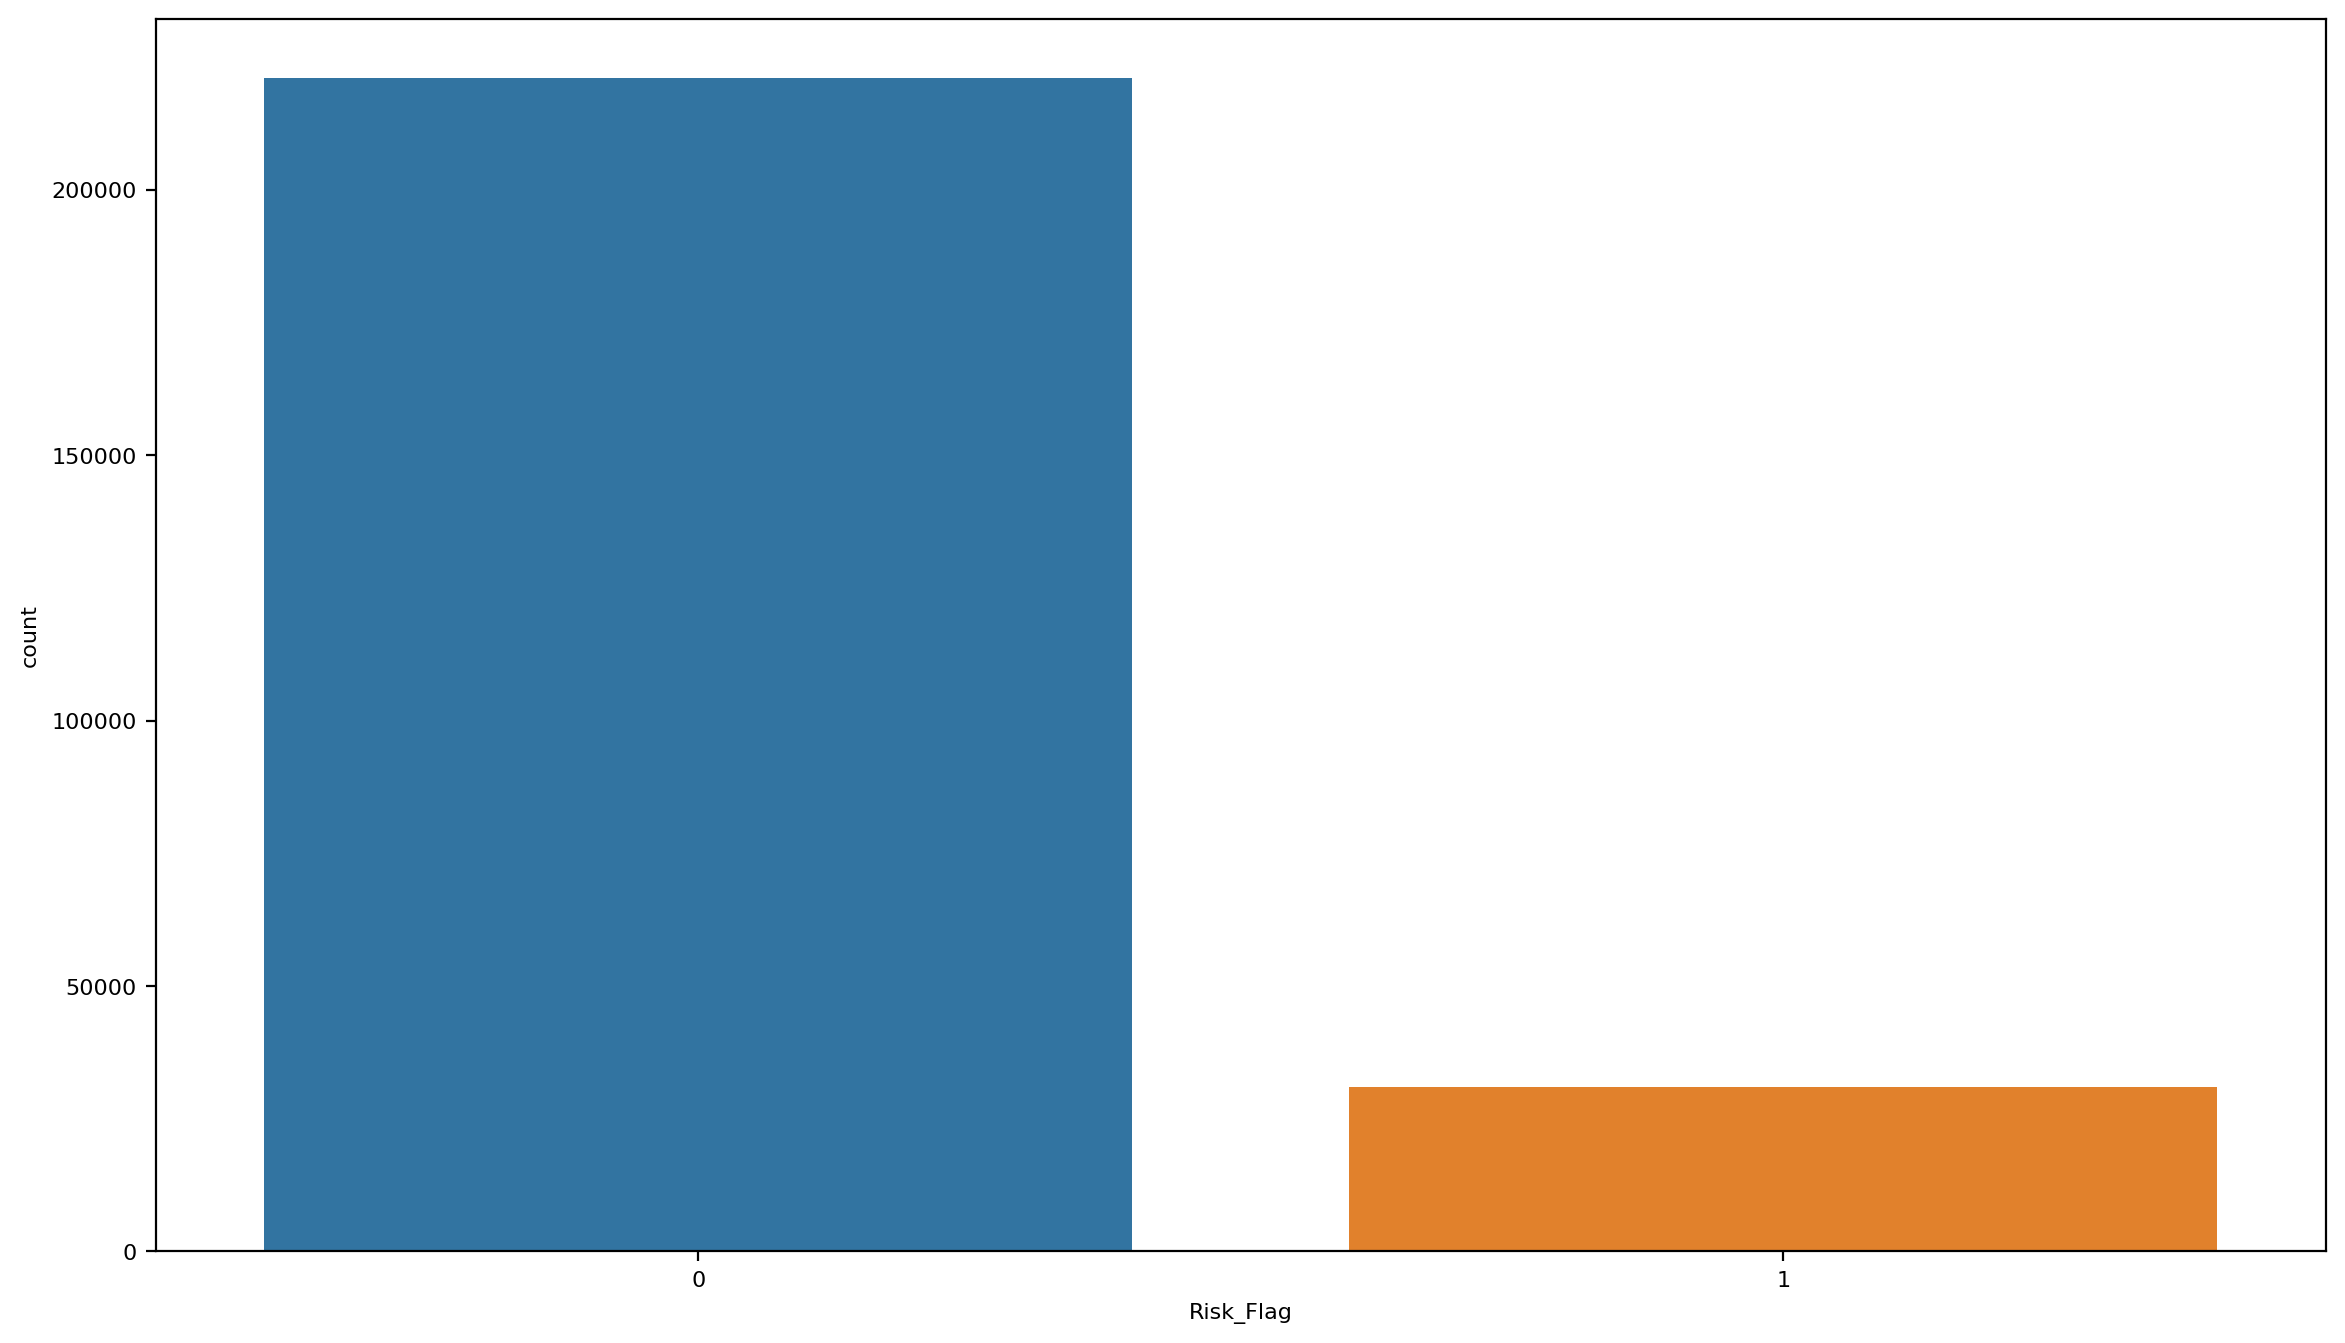

In [ ]:
sns.countplot(x=y)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                             random_state=1)
def splitdata(X, y):
  for train_index, validate_index in sss.split(X, y):
    X_train, X_validate = X[train_index], X[validate_index]
    y_train, y_validate = y[train_index], y[validate_index]
  smotetm = SMOTETomek(random_state = 1)
  X_train, y_train = smotetm.fit_resample(X_train, y_train)
  return X_train, X_validate, y_train, y_validate

In [ ]:
def trainML(classifi_model, classifi_name, X_train, y_train):
  score_result = []
  classifi_model.fit(X_train, y_train)
  y_train_predict = classifi_model.predict(X_train)
  # score_result.append({'Classification Models': classifi_name, 'Accuracy': accuracy_score(y_train, y_train_predict), 'Precision': precision_score(y_train, y_train_predict), 'Recall': recall_score(y_train, y_train_predict),'F1 Score': f1_score(y_train, y_train_predict)},ignore_index = True)
  print(f1_score(y_train, y_train_predict))

In [ ]:
clf = DecisionTreeClassifier(random_state=1, max_depth=8)

In [ ]:
X_train, X_validate, y_train, y_validate = splitdata(X = transformed_data[valid_features].to_numpy(), y=y.to_numpy())

In [ ]:
trainML(clf, 'Decision Tree', X_train=X_train, y_train=y_train)

0.8513216434576298
